![](https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472)

# <center>Optimización de Presupuestos en una Empresa de Soluciones de Herrería</center>

# <center>Jose Manuel Ramirez Araiza 747818 jose.ramireza@iteso.mx</center>
# <center>Jose Armando Borregui Vidrio 727516 im727516@iteso.mx</center>
# <center>Jonathan Misael Valencia Guerra 745950 jonathan.valencia@iteso.mx</center>

# <center>21 de septiembre del 2023</center>




## Objetivos:
Minimizar los costos de producción: Reducir los gastos relacionados con materiales, mano de obra y otros recursos necesarios para llevar a cabo proyectos de herrería.
## Objetivo general:
Minimizar los costos de producción en la empresa de soluciones de herrería mediante la optimización de los recursos, considerando restricciones específicas de IVA y ganancia total.
## Objetivos específicos:
>- Identificar y definir los parámetros clave del modelo de programación lineal que representan el problema de optimización en la empresa de soluciones de herrería.
>- Desarrollar un modelo matemático que incluya la función objetivo de minimización de costos totales y las restricciones relacionadas con el IVA y la ganancia total.
>- Determinar los valores óptimos de las variables X e Y que minimizan el costo total, asegurando que se cumplan las restricciones de IVA y ganancia total.
>- Evaluar la factibilidad de la solución encontrada por el algoritmo de optimización en términos de las restricciones establecidas.
>. Presentar los resultados de la optimización, incluyendo los valores óptimos de X e Y y el costo total óptimo.
>. Analizar cómo la implementación de la solución óptima puede hacer que la empresa de soluciones de herrería sea más eficiente, competitiva y rentable en su industria.


## Modelo que representa el problema
>- Función objetivo a minimizar: $$ -Costo.total (X + Y) $$

>- Restricción de ganancia total:

$$ 7,500,000-(X+Y) $$

>- Restricción del iva:

$$ Y-0.16*X $$

>- Restricción de Ganancia Total:
La ganancia total debe ser al menos 7,500,000:

>- Restricción de Ganancia: $$ X + Y >= 7,500,000 $$ 

>- Límites de Variables:
Las variables X e Y deben ser no negativas, lo que se expresa mediante límites:

>- Limites: $$ X >= 0, Y >= 0 $$ 

Significado de Parámetros:

1. X: Cantidad de recursos (materiales y mano de obra) asignados a proyectos de herrería.
2. Y: Otros costos asociados a la producción de proyectos de herrería.
3. 0.16: Tasa del 16% que representa el IVA sobre el valor de X.
4. 7,500,000: Ganancia total mínima deseada por la empresa.


## Solución del problema de optimización

Subtotal óptimo: 6461320.83
IVA: 1038679.17
Costo total óptimo: 7500000.0
Ganancia total óptima: 1469127.09


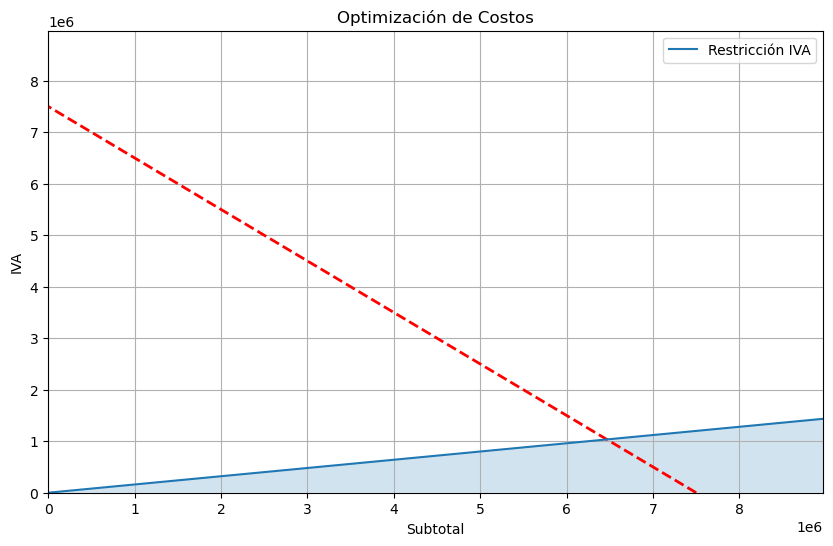

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos de costos
subtotal_actual = 7732006.11
iva_actual = 1237120.98 
gran_total_presupuestado = 8969127.09 

# Función objetivo a minimizar: -Costo total (X + Y)
def costo_total(params):
    X, Y = params
    return -(X + Y)

# Restricciones
def restriccion_iva(params):
    X, Y = params
    return Y - 0.16 * X  # Restricción donde el IVA debe de ser de 16%

def restriccion_ganancia(params):
    X, Y = params
    return 7500000 - (X + Y)  # Restricción de la ganancia total

# Valores iniciales para X y Y
x0 = np.array([subtotal_actual, iva_actual])

# Definir las restricciones de optimización
restricciones = [{'type': 'ineq', 'fun': restriccion_iva},
                 {'type': 'ineq', 'fun': restriccion_ganancia}]

# Rango de valores válidos para X e Y (no negativos)
limites = [(0, None), (0, None)]

# Realizar la optimización
resultado = minimize(costo_total, x0, constraints=restricciones, bounds=limites)

# Obtener los resultados óptimos
X_optimo, Y_optimo = resultado.x

# Calcular el costo total
costo_total_optimo = X_optimo + Y_optimo

# Mostrar los resultados
X_optimo_redondeado = round(X_optimo, 2)
Y_optimo_redondeado = round(Y_optimo, 2)
costo_total_optimo_redondeado = round(costo_total_optimo, 2)


print("Subtotal óptimo:", X_optimo_redondeado)
print("IVA:", Y_optimo_redondeado)
print("Costo total óptimo:", costo_total_optimo_redondeado)


# Verificar la ganancia total
ganancia_total_optima = gran_total_presupuestado - costo_total_optimo
ganancia_total_optima_redondeado = round(ganancia_total_optima, 2)
print("Ganancia total óptima:", ganancia_total_optima_redondeado)


# Puedes usar estos valores óptimos en tu presupuesto.

# Crear gráfica
X_range = np.linspace(0, gran_total_presupuestado, 100)
Y_range = np.linspace(0, gran_total_presupuestado, 100)
X_grid, Y_grid = np.meshgrid(X_range, Y_range)
Z = -(X_grid + Y_grid)

plt.figure(figsize=(10, 6))
plt.contour(X_grid, Y_grid, Z, levels=[-costo_total_optimo], colors="red", linewidths=2)
plt.plot(np.linspace(0, gran_total_presupuestado, 100), 0.16 * np.linspace(0, gran_total_presupuestado, 100), label="Restricción IVA")
plt.fill_between(np.linspace(0, gran_total_presupuestado, 100), 0, 0.16 * np.linspace(0, gran_total_presupuestado, 100), alpha=0.2)
plt.xlabel('Subtotal')
plt.ylabel('IVA')
plt.title('Optimización de Costos')
plt.grid(True)
plt.legend()
plt.show()


## Conclusiones
La solución incluye la obtención de los valores óptimos de X e Y, así como el cálculo del costo total óptimo. Esta solución factible permite a la empresa tomar decisiones informadas sobre cómo asignar recursos de manera eficiente, reducir costos de producción y cumplir con sus objetivos financieros.


En conclusión, el enfoque principal del proyecto fue reducir los costos de producción en la empresa de soluciones de herrería y esto implica encontrar formas más eficientes de gestionar los recursos, como materiales y mano de obra, para ejecutar proyectos de herrería. 


A través de un modelo matemático, hemos ilustrado cómo la asignación eficiente de recursos bajo restricciones de IVA y ganancia total puede conducir a una mejora significativa en la eficiencia y rentabilidad de la producción.
Esta optimización tuvo como objetivo hacer que la empresa sea más eficiente, competitiva y rentable en su industria de herrería.


# Referencias
CIMTRA. (22 de Diciembre de 2020). CIMTRA. Obtenido de http://cimtrajalisco.org/iteso/

